<a href="https://colab.research.google.com/github/Sameersingh343/ML_SUPERVISED_LEARNING_SALES_PRIDICTION_PROJECT/blob/main/ML_SUPERVISED_LEARNING_SALES_PRIDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Pridiction


**Project Type**    - Regression
##### **Contribution**    - Team (The Nile)
##### **Team Member 1 -** Paras Hirapara
##### **Team Member 2 -** Devender kumar
##### **Team Member 3 -** Sameer Sing
##### **Team Member 4 -** Arpita
##### **Team Member 5 -** Arti Gaur

# Project Description

In seven European nations, Rossmann runs more than 3,000 pharmacies. Rossmann store managers are currently required to forecast their daily sales up to six weeks in advance. Numerous factors, such as marketing, rivalry, state and federal holidays, seasonality, and location, affect store sales. The accuracy of the results can be highly variable because thousands of different managers are making sales predictions based on their own situations.

# **GitHub Link -**

# **Problem Statement**


The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

# **Approach**



*   Business Problem
*   Data Collection and Preprocessing - Importing important libraries and modules - Data Cleaning - Missing Data Handling - Merging the Datasets


*   Exploratory Data Analysis - Hypotheses - Categorical Features - Continuous Features - EDA Conclusion and Validating Hypotheses

*   Feature Selection and Outlier Detection - Feature Engineering - Outlier Detection and Treatment



*   Modeling - Train Test Split - Baseline Model - Decision Tree - Random Forest Model - Random Forest Hyperparameter Tuning - Random Forest Feature Importance
*   Model Performance and Evaluation - Visualizing Model Performances - Random Forest vs Baseline Model - Random Forest Tuned vs Baseline and Random Forest Models


*   Store wise Sales Predictions

*   Conclusion and Recommendations







# **Data Description**

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory.

**Id** - an Id that represents a (Store, Date) duple within the set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (Dependent Variable)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

**CompetitionDistance** - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
from seaborn.rcmod import set_style

# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-3a40d66ad51e>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset path

sales_df = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv",parse_dates=['Date'])
stores_df = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction/store.csv")

## **2. Understanding Your Variables**

### Dataset First View

In [4]:
# Dataset First Look

sales_df.head(6)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1


In [5]:
stores_df.head(6)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN


In [6]:
# Description of sales dataset

sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Description of store dataset

stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In this dataset no any missing and duplicate values.

### Dataset Rows & Columns count

In [8]:
# Sales Rows & Columns count

sales_df.shape

(1017209, 9)

In [9]:
# Store Rows & Columns count

stores_df.shape

(1115, 10)

### Dataset Information

In [10]:
# Sales data Info

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [11]:
# Store data Info

stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count for store and sales dataset

a=len(sales_df[sales_df.duplicated()])
b=len(stores_df[stores_df.duplicated()])

print("Duplicate values of sales_df =",a)
print("Duplicate values of stores_df =",b)

Duplicate values of sales_df = 0
Duplicate values of stores_df = 0


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count for sales data

sales_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
# Missing Values/Null Values Count for sales and store data set

stores_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We found that in store_df data set many missing values in five different columns.

**CompetitionDistance** - Distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

## **3. Data Wrangling**

Text(0.5, 0, 'Competition Distance Distribution Plot')

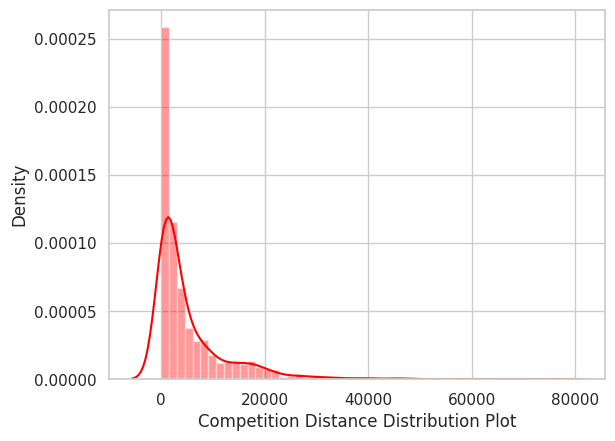

In [15]:
#distribution plot of competition distance

sns.distplot(x=stores_df['CompetitionDistance'], hist = True, color="red")
plt.xlabel('Competition Distance Distribution Plot')

**What all manipulations have you done and insights you found?**

It appears that the CompetitionDistance distribution is biassed to the right and that the majority of values are to the left. That means greater resistance to the effects of outliers exists in the median.

In [16]:
# filling competition distance with the median value

stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [17]:
# filling Competition Open Since Month / year missing vaules with the most occureing values. i.e. mode of the respective data

stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [18]:
# filling nan values in Promo2 Since Week, Promo2 Since Year and Promo Interval cloumns with the zero value.

stores_df['Promo2SinceWeek'].fillna(value=0, inplace = True)
stores_df['Promo2SinceYear'].fillna(value=0, inplace = True)
stores_df['PromoInterval'].fillna(value=0, inplace = True)

In [19]:
# Missing Values/Null Values Count for sales and store data set

stores_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

We have two different dataset. One is for store and another is for sales in various locations. Based on analysis we found that in sales dataset 1017209 rows and 9 columns, where in stores dataset 1115 rows and 10 columns. Than we try to show descriptive statistical term of both the dataset with help of describe function.

We also find null values in stores dataset and try to fill this null values as well.

1.   Competition distance columns shows that the distribution skewss in right direction and major values are located toward the left side. So, here we try to fill null valuues with the median and run the command.
2.   Similarly fill the Competition Open Since Month / year missing vaules the most repeating month and year.

# **Merging the two Datasets**

In [20]:
# Merge sales dataset woth the stores dataset

df = sales_df.merge(right = stores_df, how = "left")

In [21]:
# Visualization of the merged dataset

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [22]:
# Visualization of the merged dataset

df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [23]:
# Shape of the merged dataset

df.shape

(1017209, 18)

In [24]:
# Info of the merged dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [25]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [26]:
# Creating a categorical variable column list

categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [27]:
# Checking the unique values involved with the dataset columns

for i in categorical_variables:
  print(f'Unique values for {i} is : {df[i].unique()}')

Unique values for DayOfWeek is : [5 4 3 2 1 7 6]
Unique values for Open is : [1 0]
Unique values for Promo is : [1 0]
Unique values for StateHoliday is : ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday is : [1 0]
Unique values for StoreType is : ['c' 'a' 'd' 'b']
Unique values for Assortment is : ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth is : [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear is : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2 is : [0 1]
Unique values for Promo2SinceWeek is : [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear is : [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval is : [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [28]:
# Change int type in State Holiday

df['StateHoliday'].replace({'0':0}, inplace=True)

In [29]:
# Creating features from the datetime column

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

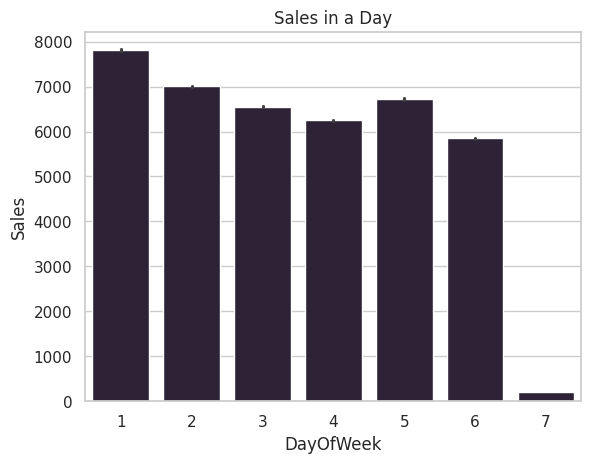

In [30]:
# Chart - 1 Categorical variables day of week against sales

sns.barplot(x=df["DayOfWeek"], y=df['Sales'])
plt.title("Sales in a Day")

plt.show()

##### 1. Why did you pick the specific chart?

This graph simply show relation between different day with the sales. Thats the reason i prefere this graph.

##### 2. What is/are the insight(s) found from the chart?

Based on analysis, we found that the 6 days in a week in which store is open and first day (Monday) of the week has a highest sales compare to other. Similarliy on last day (Sunday) of the week, we found that the much lower the sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We try to manage as much as stocks during monday so, custmoer setisfaction achive.

#### Chart - 2

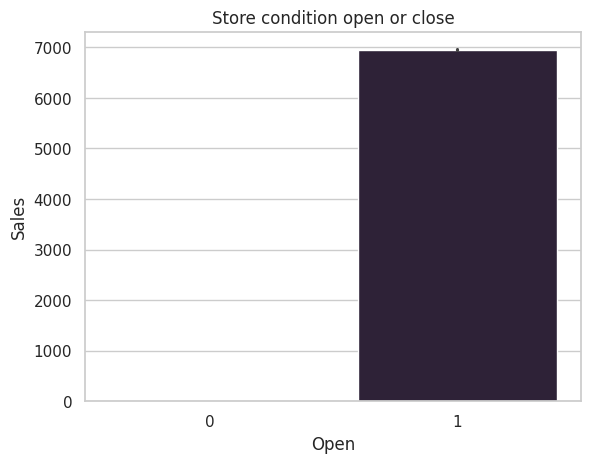

In [31]:
# Chart - 2 visualization code

sns.barplot(x=df["Open"], y=df["Sales"])
plt.title("Store condition open or close")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Store always open during the sales time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If try to manage store should open on sunday as well sale may incres and profit as well.

#### Chart - 3

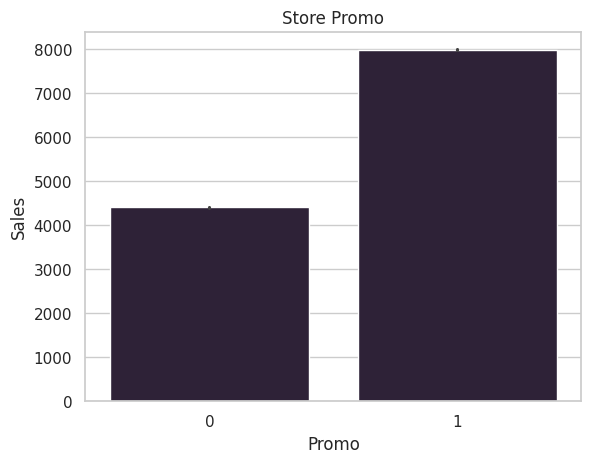

In [32]:
# Chart - 3 visualization code

sns.barplot(x=df["Promo"], y=df["Sales"])
plt.title("Store Promo")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Results reviled that the from total sales half sale from non promo and remaing half from promo.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on that we conclude that need more affort on promo to increase sales.

#### Chart - 4

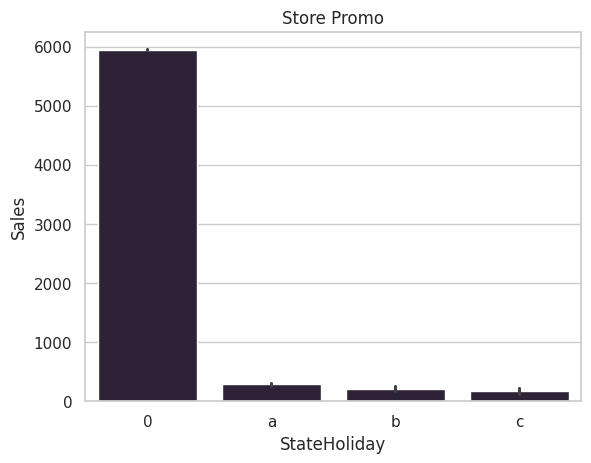

In [33]:
# Chart - 4 visualization code

sns.barplot(x=df["StateHoliday"], y=df["Sales"])
plt.title("Store Promo")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.

#### Chart - 5

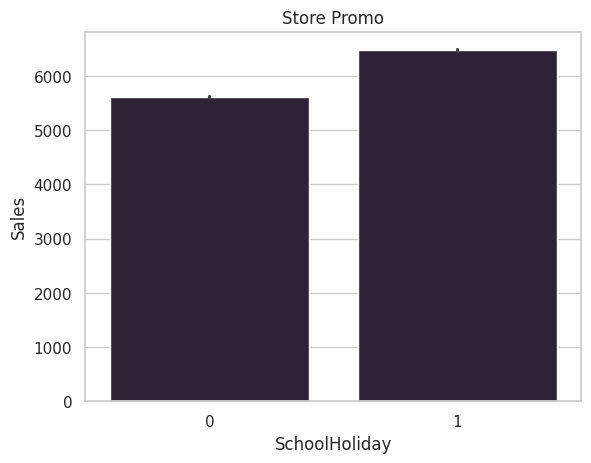

In [34]:
# Chart - 5 visualization code

sns.barplot(x=df["SchoolHoliday"], y=df["Sales"])
plt.title("Store Promo")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

#### Chart - 6

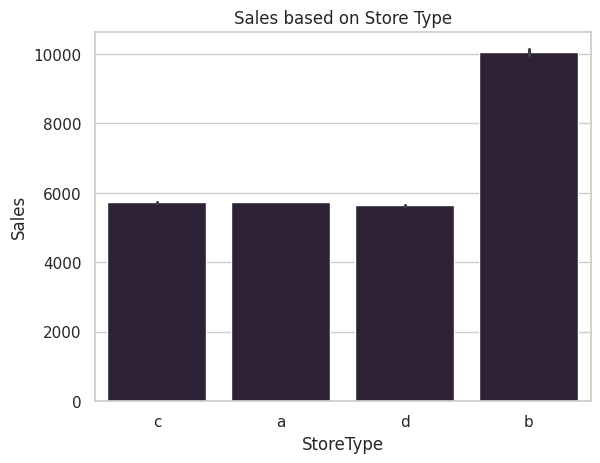

In [35]:
# Chart - 6 visualization code

sns.barplot(x=df["StoreType"], y=df["Sales"])
plt.title("Sales based on Store Type")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Compare all stores on an average store b has highest sales. While remaing three has same sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Need to focus on store a, c and d to increase sales as well by promotion its product in market or by applying good offer to customners.

#### Chart - 7

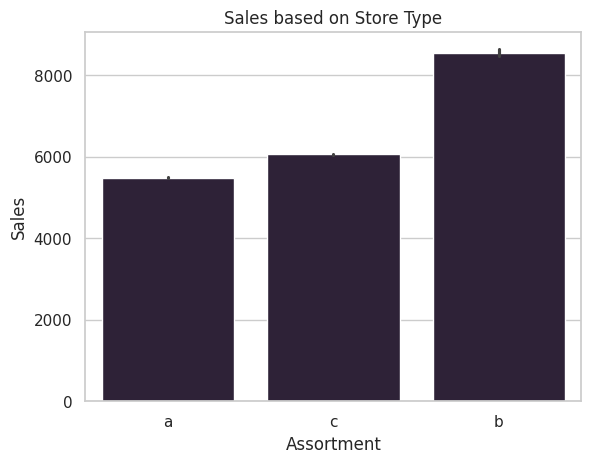

In [36]:
# Chart - 7 visualization code

sns.barplot(x=df["Assortment"], y=df["Sales"])
plt.title("Sales based on Store Type")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Highest level assortment in level b (Extra) followed by c and a.

#### Chart - 8

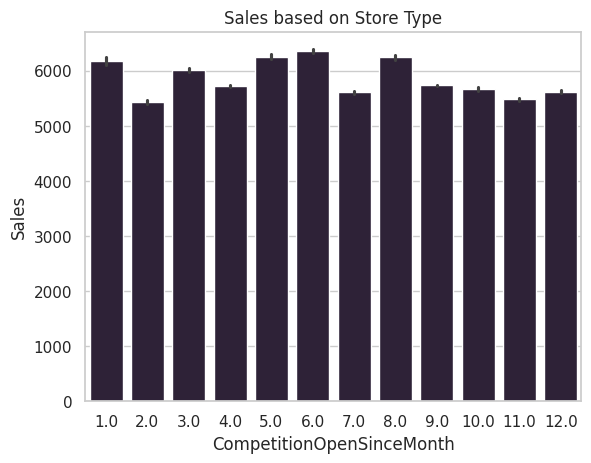

In [37]:
# Chart - 8 visualization code

sns.barplot(x=df["CompetitionOpenSinceMonth"], y=df["Sales"])
plt.title("Sales based on Store Type")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Total sales before compition around 8000, than when compittiter comes in markest sale may slight decreases. On monthly sacale sales may vary, but on an avergae higher sales found during 5 and 6 months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Store owner need to more focus on give cetisfaction to customers by giving good product, servivces and best offers as well.

#### Chart - 9

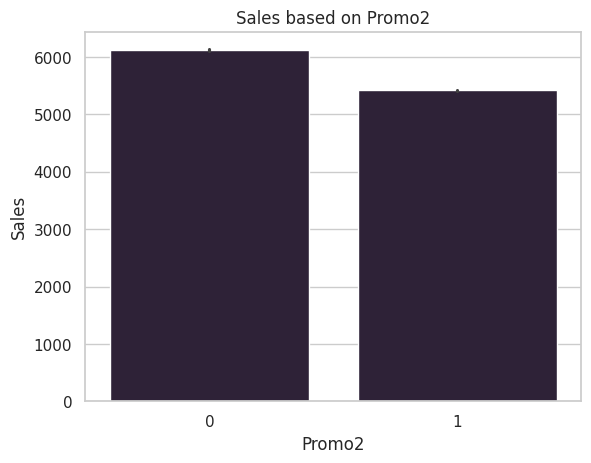

In [38]:
# Chart - 9 visualization code

sns.barplot(x=df["Promo2"], y=df["Sales"])
plt.title("Sales based on Promo2")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

#### Chart - 10

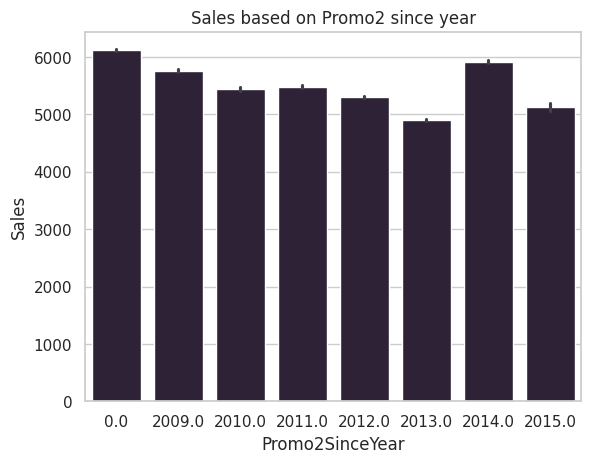

In [39]:
# Chart - 10 visualization code

sns.barplot(x=df["Promo2SinceYear"], y=df["Sales"])
plt.title("Sales based on Promo2 since year")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Here, we shows that the starting year shows zero value, whiuch indicates  that the some eroor in data points. But store strat promotion since 2009 to 2015 and 2014 year has higest sales in store. Overall trend indicates that the stores sales decreasing trend except 2014 year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Learn from 2014 year for sales and marketing stretegies and apply to upcoming year to increase profite of stores.

#### Chart - 11

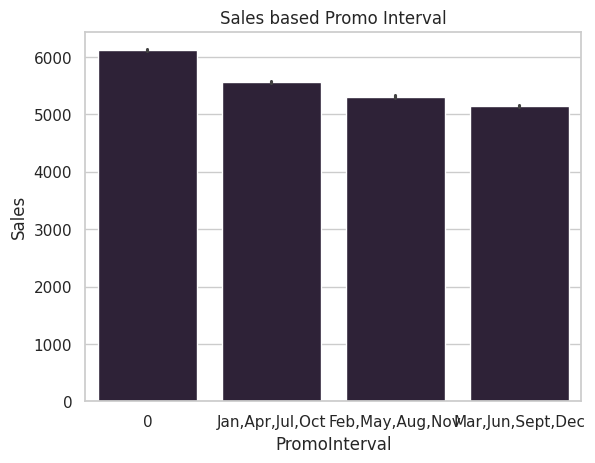

In [40]:
# Chart - 11 visualization code

sns.barplot(x=df["PromoInterval"], y=df["Sales"])
plt.title("Sales based Promo Interval")

plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Here, first promotion interval has higest sales compare to other intervals. This indicates effort done by this interval is good and it is benifited for the store sales.

#### Chart - 12

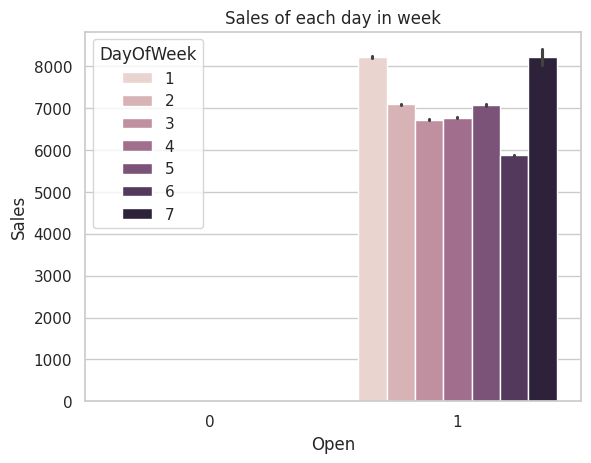

In [41]:
# Chart - 12 visualization code

sns.barplot(x=df["Open"], y=df["Sales"], hue=df["DayOfWeek"])
plt.title("Sales of each day in week")
plt.show()

##### 1. Why did you pick the specific chart?

This type of graph use compare of two variable in single window.

##### 2. What is/are the insight(s) found from the chart?

Graph clearly shows that the no sales during close period and sales start when store open. During whole week sales is highest  on first and last day of week.

#### Chart - 13

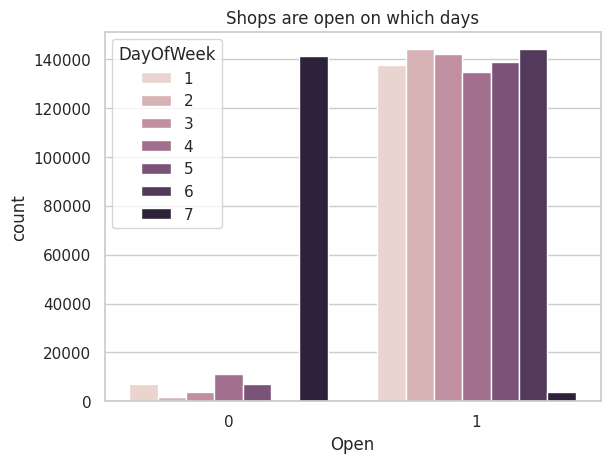

In [42]:
# Chart - 13 visualization code

sns.countplot(x=df["Open"], hue=df["DayOfWeek"])
plt.title("Shops are open on which days")
plt.show()

##### 1. Why did you pick the specific chart?

This is a count plot of open shops according to the day of the week to find total number in each category.

##### 2. What is/are the insight(s) found from the chart?

It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

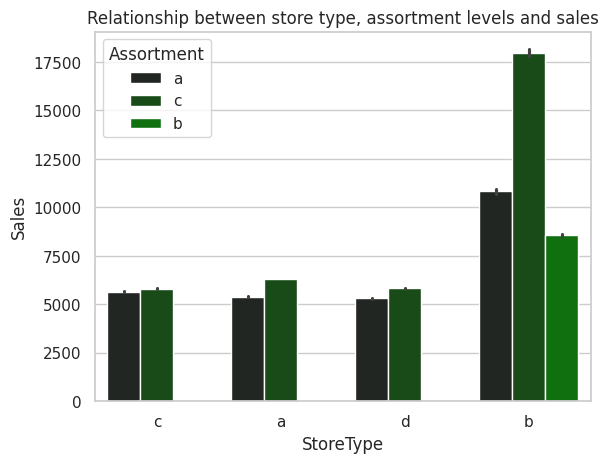

In [43]:
sns.barplot(x=df["StoreType"], y=df["Sales"], hue=df["Assortment"], color="green")
plt.title("Relationship between store type, assortment levels and sales")
plt.show()

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [44]:
# Exploration about store type and its total sales & coustemers.

store_type = df.groupby("StoreType") ["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending = False, inplace = True)
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


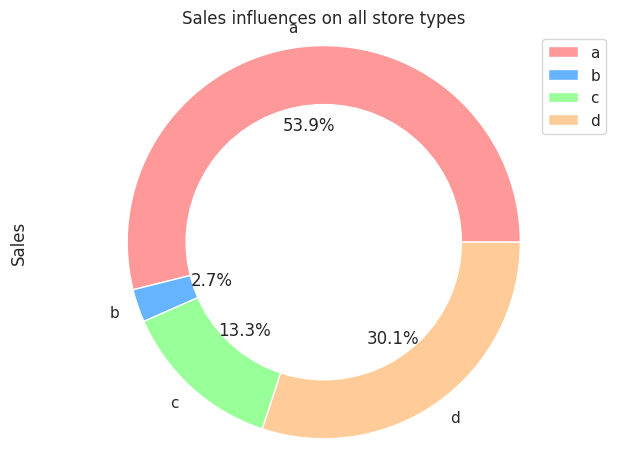

In [45]:
# Try to explore store type a bit and it's influence on sales

# add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# plot pie chart
fig1, ax1 = plt.subplots()
df.groupby("StoreType") ["Sales"].sum().plot.pie(title = "Sales influences on all store types", legend = True, autopct='%1.1f%%', colors = colors)

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

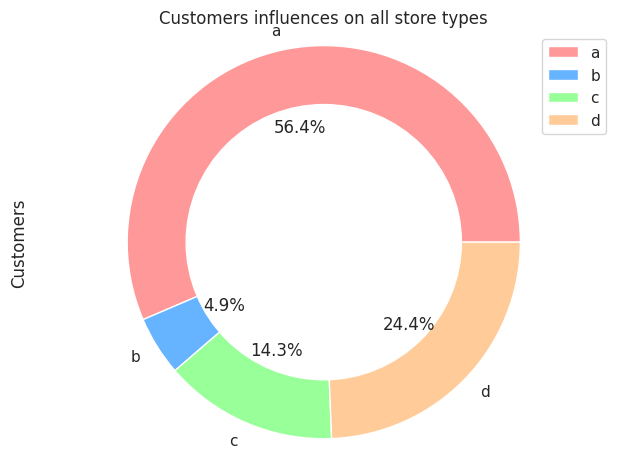

In [46]:
# Try to explore store type a bit and it's influence on customers

# add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# plot pie chart
fig1, ax1 = plt.subplots()
df.groupby("StoreType") ["Customers"].sum().plot.pie(title = "Customers influences on all store types", legend = True, autopct='%1.1f%%', colors = colors)

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

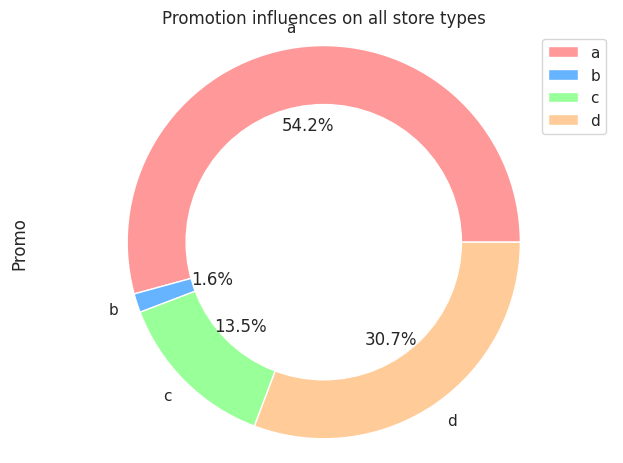

In [47]:
# Try to explore store type a bit and it's influence on promotiopn

# add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# plot pie chart
fig1, ax1 = plt.subplots()
df.groupby("StoreType") ["Promo"].sum().plot.pie(title = "Promotion influences on all store types", legend = True, autopct='%1.1f%%', colors = colors)

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

A bar plot shows the height of each rectangle as an estimate of central tendency for a numerical variable. Because the default estimation function for the barplot is mean, it was previously observed that store type B had the highest average sales.

But after more investigation, it became evident that the store type a had the largest sales since there were so many type a retailers in our dataset. Sales and customer share for stores of types A and C were comparable.

Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

In [48]:
# years in dataset
years

array([2015, 2014, 2013])

In [49]:
# sales over the different years

sales_df_2013 = df[df['Year'] == 2013]
sales_df_2014 = df[df['Year'] == 2014]
sales_df_2015 = df[df['Year'] == 2015]

In [50]:
# Sales over various month

sales_2013 = sales_df_2013.groupby("Month").sum().reset_index()
sales_2014 = sales_df_2014.groupby("Month").sum().reset_index()
sales_2015 = sales_df_2015.groupby("Month").sum().reset_index()

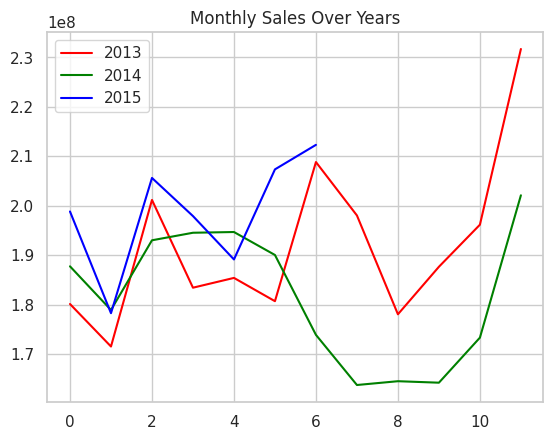

In [51]:
# Line graph compariosion for various maonthl;y sales

plt.plot(sales_2013.loc[:,'Sales'], label = "2013", color = "red")
plt.plot(sales_2014.loc[:,'Sales'], label = "2014", color = "green")
plt.plot(sales_2015.loc[:,'Sales'], label = "2015", color = "blue")
plt.title('Monthly Sales Over Years')
plt.legend()

Based on data we found that their is peak at every 2 month interval for february and june month in all dataset. Which indicates sales during this months is increasing on all years.

Sales increase up by the end of the year before the holidays.

Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

<Axes: xlabel='Customers', ylabel='Sales'>

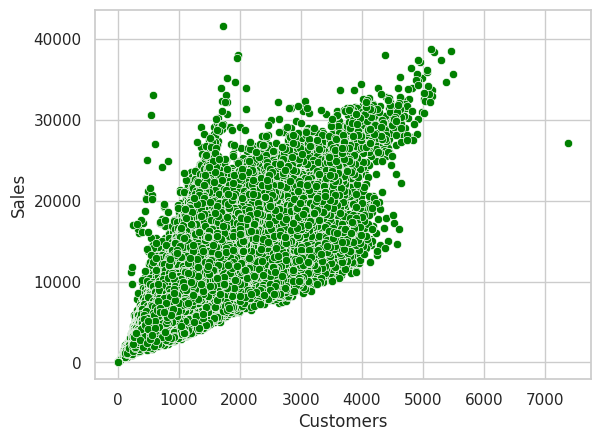

In [52]:
# Scatter plot between customers and sales

sns.scatterplot(x = df["Customers"], y = df["Sales"], color='green')

Relation give positive outcome. It indicates as the number of customers increase total sales of stotre als incresing.

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

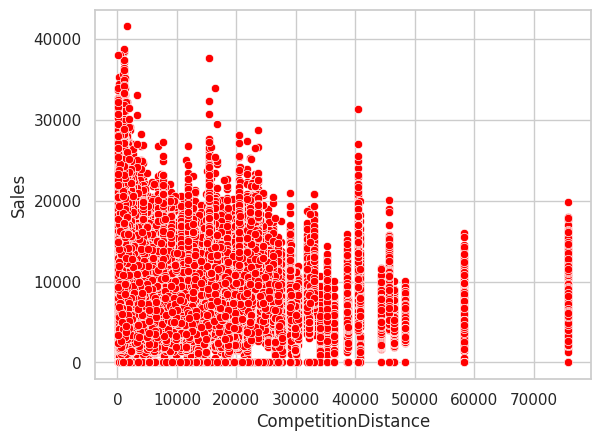

In [53]:
# scatterplot of Competition Distance and Sales

sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'], color='red')

From the above scatter plot we found that the as the near the stores or more the store density higher the sales. Lesser store density or far away store means less sales.

<Axes: ylabel='Density'>

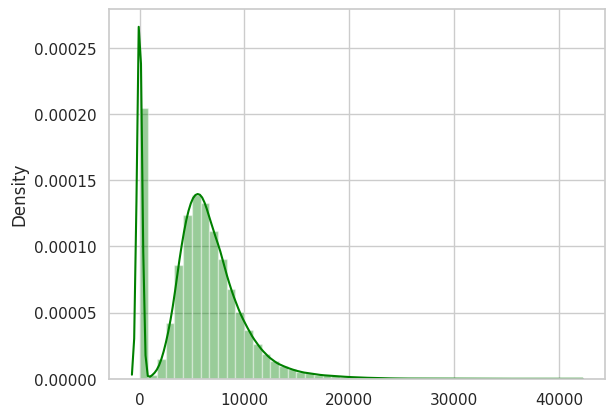

In [54]:
# distribution plot of Sales, as expected positively skewed

sns.distplot(x=df['Sales'], color='green')

This plot shows that the sales data has right skewed distribution. The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

#### Chart - 14 - Correlation Heatmap

In [55]:
# Use only meaningful numeric columns, let's drop the unnecessary to get a clear picture

columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

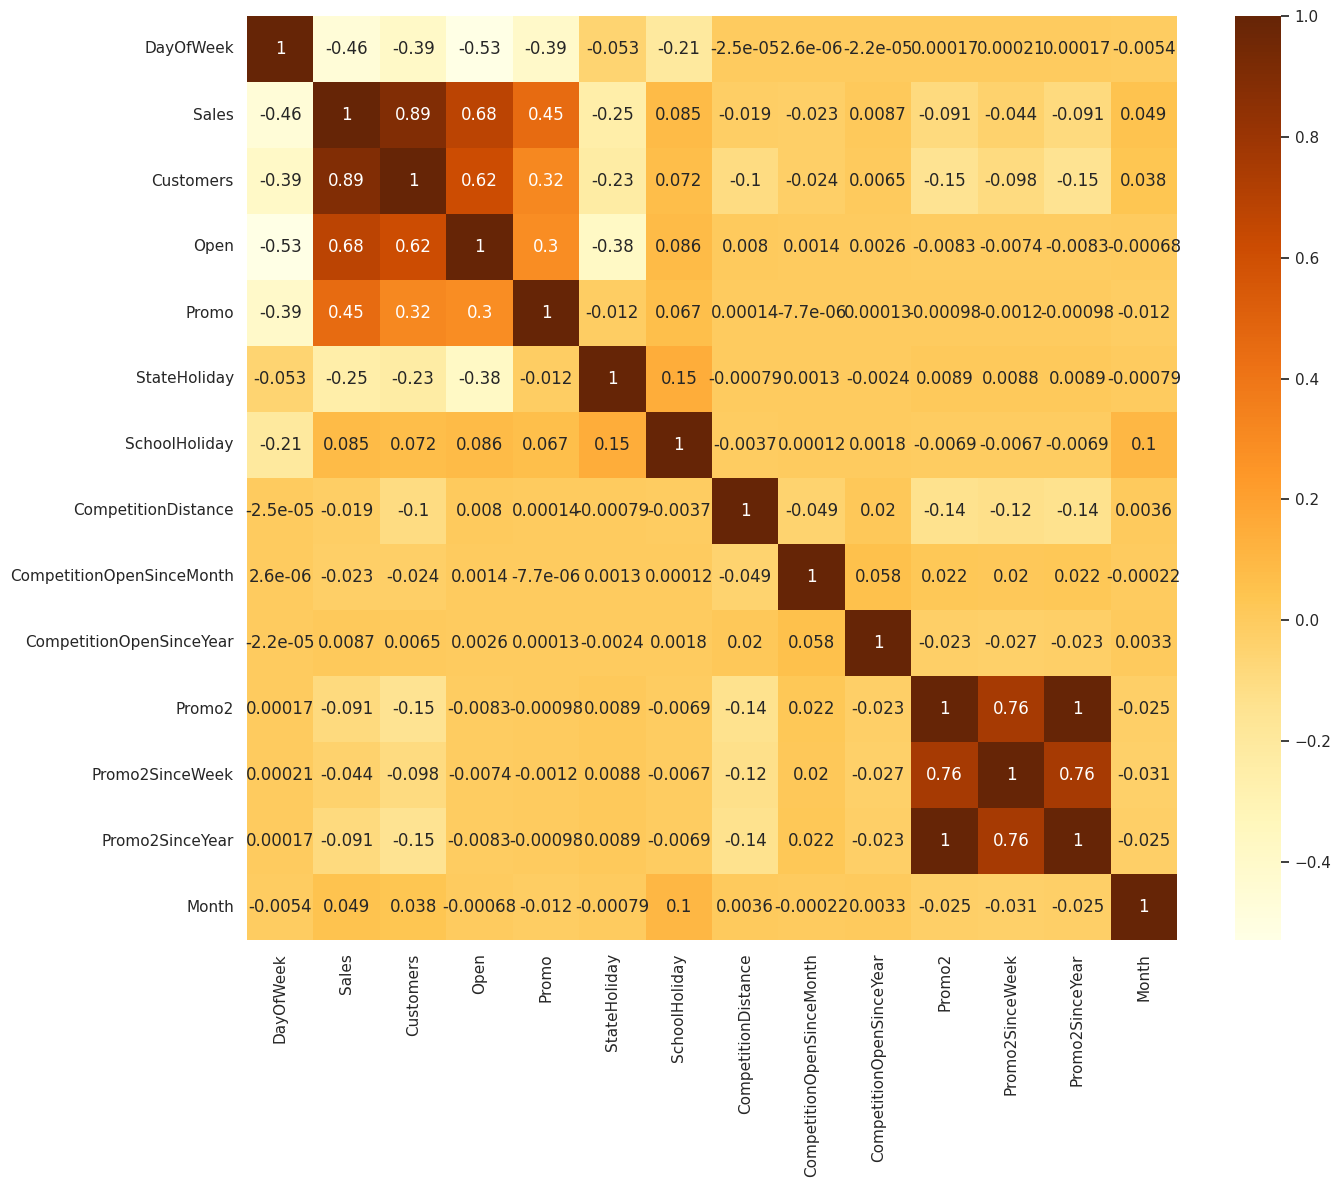

In [56]:
# Correlation Heatmap visualization code

x = corr_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(x, cmap="YlOrBr", annot=True)

##### 2. What is/are the insight(s) found from the chart?

State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.

CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.


Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.

The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

One set of bunch of sales, promo, customers and open has colinearity to each other, while another set of bunch of promo2, promo2sinceyear and promo2sinceweek also colinar in nature with respect to each other.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average sales of the stores is less than 5000.

Ho - < 4500

Ha - > 4500

#### 2. Perform an appropriate statistical test.

In [57]:
# extract sales column from dataset and try to find shape of the sales
sales = pd.DataFrame(df, columns = ['Sales'])

sales.shape

(1017209, 1)

In [58]:
# mean of the sales
sales.mean()

Sales    5773.818972
dtype: float64

In [59]:
# standard deviation of sales
sales.std()

Sales    3849.926175
dtype: float64

In [60]:
# convert sales data into list formate

sales_list = df["Sales"].tolist()

In [61]:
# choose random sample from sales dataset (sample size is 1000)

import random
random_sample = random.sample(sales_list, 200)
random_samples = pd.DataFrame(random_sample)

In [62]:
random_samples.mean()

0    6034.795
dtype: float64

In [63]:
def calculate_z_score(value, random_samples):
    mean = random_samples.mean()
    std_dev = random_samples.std()
    square_root = math.sqrt(len(random_sample))
    z_score = (mean - value) / (std_dev / square_root)
    return z_score

In [64]:
average_sales = 4500

z_score = calculate_z_score(average_sales, random_samples)
print("Z-Score:", z_score)

Z-Score: 0    4.957454
dtype: float64


In [65]:
# We can calculate p-value

prob_z = norm.cdf(z_score)
print(prob_z)

[0.99999964]


In [66]:
P_value = 1 - prob_z
print(P_value)

[3.57114735e-07]


##### Which statistical test have you done to obtain P-Value?

Here, we use z scroe to find p value for hypothesis testing.

Based on observation, we reject the null hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [67]:
# Handling Missing Values & Missing Value Imputation

# since the stores closed had 0 sale value; removing the irrelevant part

df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


#### What all missing value imputation techniques have you used and why did you use those techniques?

In given data set many variable has zero value, with help of drop function we try to remove non usefull values.

In store data set has aslo many nonnull values, we try to solve this error with help of various statistical indicatores (Mean, Mode, Median).

<Axes: ylabel='Density'>

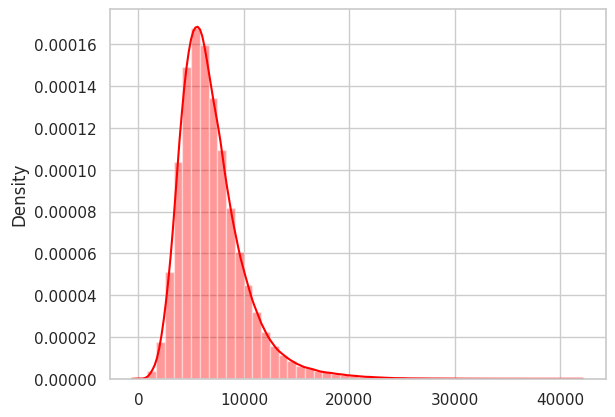

In [68]:
# distribution plot of Sales, as expected positively skewed

sns.distplot(x=df1['Sales'], color = "red")

# **Data Transformation**

<Axes: ylabel='Density'>

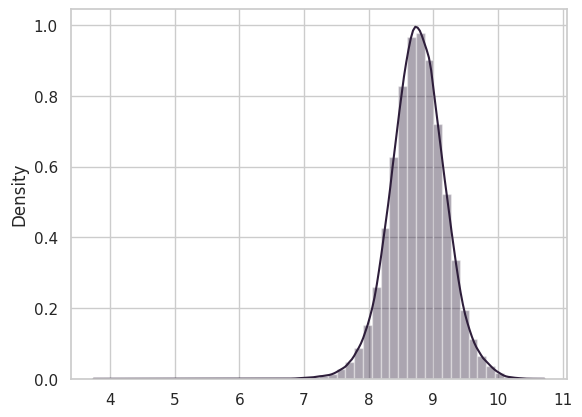

In [69]:
# transformation

df1['Sales'] = np.log(df1['Sales'])

df1.dropna(inplace=True)

df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

sns.distplot(x=df1['Sales'])

### 2. Handling Outliers

**What all outlier treatment techniques have you used and why did you use those techniques?**

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

In [70]:
# Handling Outliers & Outlier treatments

# mean of sales
sales_mean = np.mean(df["Sales"])

# standard deviation of sales
sales_std = np.std(df["Sales"])

# we more than 3 threshold is consider as outlier
threshold = 3
outliers = []

for value in df1["Sales"]:
  z_score = (value - sales_mean)/sales_std
  if z_score > threshold:
    outliers.append(value)

#total no of outliers
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')

Total number of Outliers present in the Sales column are 0.


The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers.

In [71]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [72]:
#exploring the reasons behind this behaviour
sales_outliers

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
1113,1114,5,2015-07-31,10.222232,3745,1,0,1,a,c,...,9.0,2013.0,0,0.0,0.0,0,2015,7,31,212
5301,842,1,2015-07-27,10.235701,1493,1,0,0,d,c,...,11.0,2007.0,0,0.0,0.0,0,2015,7,31,208
5836,262,7,2015-07-26,10.390440,4783,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207
13641,262,7,2015-07-19,10.362967,4691,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2015,7,29,200
20886,817,1,2015-07-13,10.210163,3437,1,0,0,a,a,...,3.0,2006.0,0,0.0,0.0,0,2015,7,29,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979561,262,7,2013-02-03,10.272323,4144,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2013,2,5,34
993496,817,2,2013-01-22,10.210605,7388,1,0,0,a,a,...,3.0,2006.0,0,0.0,0.0,0,2013,1,4,22
994611,817,1,2013-01-21,10.330942,3900,1,0,0,a,a,...,3.0,2006.0,0,0.0,0.0,0,2013,1,4,21
1009106,817,2,2013-01-08,10.241744,3862,1,0,0,a,a,...,3.0,2006.0,0,0.0,0.0,0,2013,1,2,8


In [73]:
#lets see which stores were open on Sunday in the outliers dataframe

sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
5836,262,7,2015-07-26,10.390440,4783,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207
13641,262,7,2015-07-19,10.362967,4691,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2015,7,29,200
21446,262,7,2015-07-12,10.381924,4623,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2015,7,28,193
29251,262,7,2015-07-05,10.317417,4762,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2015,7,27,186
37056,262,7,2015-06-28,10.268721,4450,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2015,6,26,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932731,262,7,2013-03-17,10.247822,4204,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2013,3,11,76
940536,262,7,2013-03-10,10.207068,4130,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2013,3,10,69
948341,262,7,2013-03-03,10.280210,4314,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2013,3,9,62
971756,262,7,2013-02-10,10.209280,4133,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2013,2,6,41


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

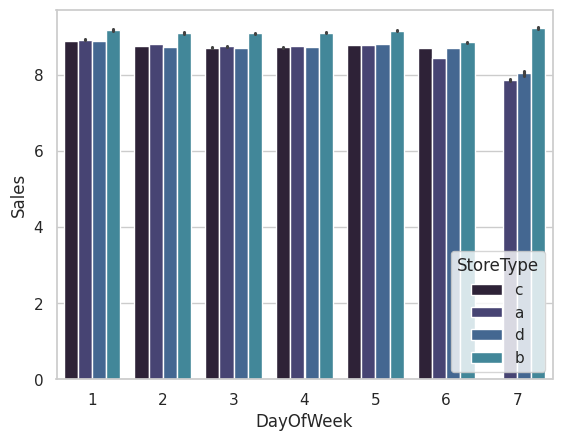

In [74]:
#let's explore store type and Day Of week
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])

In [75]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
5659,85,7,2015-07-26,9.343209,1606,0,0,0,b,a,...,10.0,2011.0,0,0.0,0.0,0,2015,7,30,207
5833,259,7,2015-07-26,9.680219,2857,0,0,0,b,b,...,9.0,2013.0,0,0.0,0.0,0,2015,7,30,207
5836,262,7,2015-07-26,10.390440,4783,0,0,0,b,a,...,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207
5848,274,7,2015-07-26,8.955448,1608,0,0,0,b,b,...,9.0,2013.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,30,207
5909,335,7,2015-07-26,8.985696,1509,0,0,0,b,a,...,9.0,2013.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,30,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011201,682,7,2013-01-06,8.736811,1077,0,0,0,b,a,...,9.0,2006.0,0,0.0,0.0,0,2013,1,1,6
1011252,733,7,2013-01-06,9.325988,2584,0,0,0,b,b,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,6
1011288,769,7,2013-01-06,8.852951,1764,0,0,0,b,b,...,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,6
1011467,948,7,2013-01-06,8.703507,1402,0,a,0,b,b,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,6


This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.

Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.

# **Textual Data Preprocessing**

In [76]:
df1.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,8.568456,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212


In [77]:
#changing into boolean

df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])

#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)

In [78]:
#changing promo2 features into meaningful inputs

#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)

#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

# **Removing Stopwords & Removing White spaces**

In [79]:
#creating a feature for promo interval and checking if promo2 was running in the sale month

def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [80]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)

#sorting index following the time series
df1.sort_index(inplace=True)

In [81]:
df1.head(2)

DayOfWeek    Sales  Customers  Promo  StateHoliday  \
Date       Store                                                       
2013-01-01 85             2  8.34759        619      0             1   
           259            2  8.83215       1444      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   

                    Promo2Open  Promo2running  
Date       Store                               
2013-01-01 85     24156.230137              0  
           259    24156.230137              0

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Here, no need for dimentionality reduction.

### 8. Data Splitting

In [82]:
#just in case something messes up
df2 = df1.copy()

In [83]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [84]:
df2.head(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,24156.230137,0,8.34759


In [85]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)

In [86]:
# Split your data to train and test. Choose Splitting ratio wisely.

#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]

#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [87]:
#csv
df_train1 = df_train.to_csv("/content/drive/MyDrive/Retail Sales Prediction/df_train.csv")
df_test2 = df_test.to_csv("/content/drive/MyDrive/Retail Sales Prediction/df_test.csv")

##### What data splitting ratio have you used and why?

Here, i split 01/01/2013 to 14/06/2015 for training purpose and 15/06/2015 to 31/07/2015 for testing purpose.

In [88]:
#X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')


The shape of X_train is: (798486, 15)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 15)
The shape of y_test is: (45852, 1)


# **Categorical Encoding**

In [89]:
#importing
from sklearn.preprocessing import OneHotEncoder

#define categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

# fit encoder to features
encoder = OneHotEncoder(sparse=False)

# train encoder
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])

# test encoder
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])

# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

# **Scaling the data**

In [90]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

## ***7. ML Model Implementation***

# **ML Model - 1 Decision Tree Regressor**

In [91]:
#Importing libraries
from sklearn.tree import DecisionTreeRegressor

In [92]:
# ML Model - 1 Implementation

# fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [93]:
# function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,Xtes_test,y_t):
# This function predicts and evaluates various models for regression algorithms, visualizes results and creates a dataframe that compares the various models.

  # making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)


  # calculate metrics and print the results for test set
  # Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)

  # Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)

  # Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)

  # R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)

  # Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

  # printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  # Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [94]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Mean Absolute Error for the validation set is 0.392952
The Mean Squared Error for the validation set is 0.323526
The Root Mean Squared Error for the validation set is 0.568794
The R^2 for the validation set is 0.656544
The Adjusted R^2 for the validation set is 0.656349


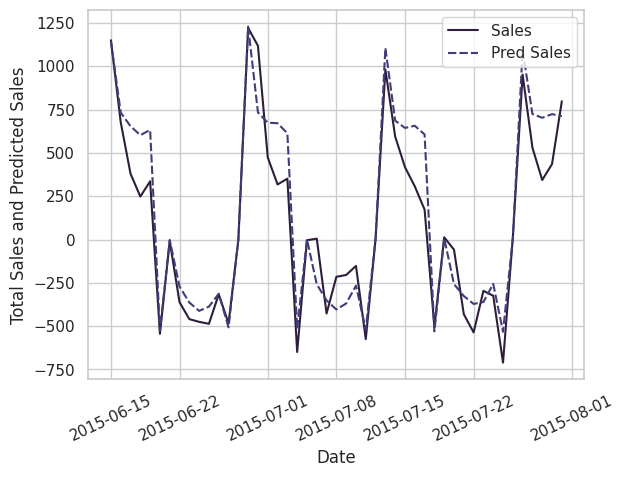

In [95]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [96]:
#add results to comparison df
add_list_to_final_df(decision_tree)

In [97]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.00366,0.003116,0.055821,0.996884,0.996884,0.392952,0.323526,0.568794,0.656544,0.656349


The baseline model- Decision tree was chosen considering our features were mostly categorical with few having continuous importance.

The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points.

Businesses prefer the model to be interpretable in nature in order to understand the patterns and strategize accordingly unlike any scientific facility where the results matter much more than interpretability.

### ML Model - 2 Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [98]:
# fitting
random_forest = RandomForestRegressor(n_estimators=50,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

The Mean Absolute Error for the validation set is 0.293864
The Mean Squared Error for the validation set is 0.165277
The Root Mean Squared Error for the validation set is 0.406543
The R^2 for the validation set is 0.824541
The Adjusted R^2 for the validation set is 0.824441


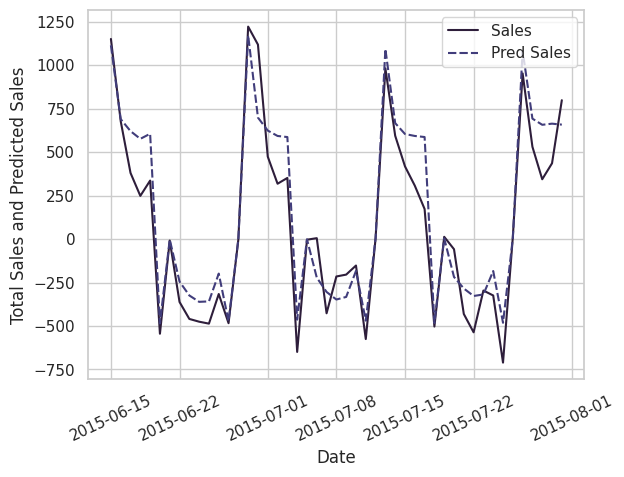

In [99]:
#model evaluation
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [100]:
# updating comparison df
add_list_to_final_df(random_f)

In [101]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003660,0.003116,0.055821,0.996884,0.996884,0.392952,0.323526,0.568794,0.656544,0.656349
1,Random Forest Regressor,0.085516,0.017244,0.131317,0.982756,0.982755,0.293864,0.165277,0.406543,0.824541,0.824441


Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results.

#### Cross- Validation & Hyperparameter Tuning

In [102]:
# Create model
rf_tuned = RandomForestRegressor()

In [103]:
# import
from sklearn.model_selection import RandomizedSearchCV

# grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [20, 40, 60]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

# fitting
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=20; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=20; total time= 1.2min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=20; total time= 1.2min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time= 1.4min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time= 1.4min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time= 1.4min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60;

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [20, 40, 60]},
                   random_state=42, verbose=2)

In [104]:
#best para
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [105]:
#save the best parameters
random_t = rf_random.best_estimator_

In [106]:
#Columns needed to compare metrics

comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

The Mean Absolute Error for the validation set is 0.298193
The Mean Squared Error for the validation set is 0.17299
The Root Mean Squared Error for the validation set is 0.415921
The R^2 for the validation set is 0.816353
The Adjusted R^2 for the validation set is 0.816249


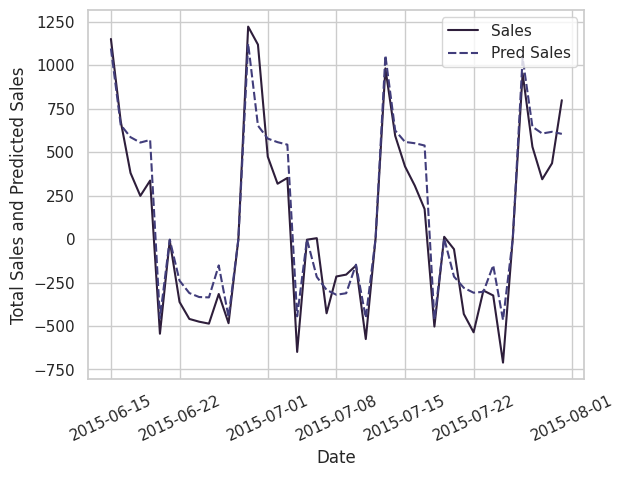

In [107]:
#evaluate tuned model
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)

In [108]:
#add to comparison_df
comparison_df = comparison_df.append(random_tuned)

In [109]:
#comparison_df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003660,0.003116,0.055821,0.996884,0.996884,0.392952,0.323526,0.568794,0.656544,0.656349
1,Random Forest Regressor,0.085516,0.017244,0.131317,0.982756,0.982755,0.293864,0.165277,0.406543,0.824541,0.824441
0,Random Forest Tuned,0.128068,0.036818,0.191880,0.963182,0.963181,0.298193,0.172990,0.415921,0.816353,0.816249


### ML Model - 3 XGBoost

In [110]:
import xgboost as xgb

In [111]:
# ML Model - 3 Implementation

# Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=50,    # Number of boosting rounds (trees)
    learning_rate=0.1,    # Step size shrinkage to prevent overfitting
    max_depth=3,          # Maximum depth of the trees
    subsample=0.8,        # Fraction of samples to be used for fitting the individual trees
    colsample_bytree=0.8, # Fraction of features to be used for fitting the individual trees
    random_state=42
)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

The Mean Absolute Error for the validation set is 0.614058
The Mean Squared Error for the validation set is 0.625654
The Root Mean Squared Error for the validation set is 0.790983
The R^2 for the validation set is 0.335804
The Adjusted R^2 for the validation set is 0.335427


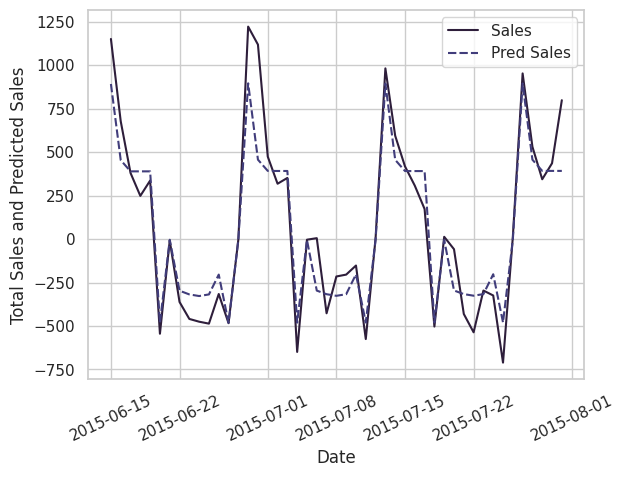

In [112]:
#model evaluation
XGBoost = model_evaluation('XGBoost Regressor',model,X_train,y_train,X_test,y_test)

In [113]:
# updating comparison df
add_list_to_final_df(XGBoost)

In [114]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003660,0.003116,0.055821,0.996884,0.996884,0.392952,0.323526,0.568794,0.656544,0.656349
1,Random Forest Regressor,0.085516,0.017244,0.131317,0.982756,0.982755,0.293864,0.165277,0.406543,0.824541,0.824441
2,XGBoost Regressor,0.639840,0.676584,0.822547,0.323416,0.323394,0.614058,0.625654,0.790983,0.335804,0.335427


In [117]:
#creating a csv file for the cleaned dataset
# Rossmann sales prediction to be continued in the next notebook, due to lack of ram colab is crashing
#creating a csv file for the comparison dataframe

results = comparison_df.to_csv("/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv")

<Axes: xlabel='Importance', ylabel='Variable'>

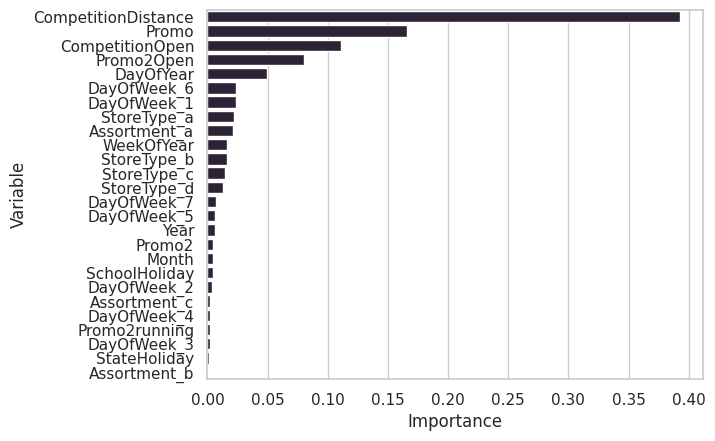

In [118]:
#visualising feature importance of XGB
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

In [119]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003660,0.003116,0.055821,0.996884,0.996884,0.392952,0.323526,0.568794,0.656544,0.656349
1,Random Forest Regressor,0.085516,0.017244,0.131317,0.982756,0.982755,0.293864,0.165277,0.406543,0.824541,0.824441
2,XGBoost Regressor,0.639840,0.676584,0.822547,0.323416,0.323394,0.614058,0.625654,0.790983,0.335804,0.335427


<Axes: xlabel='Test_R2', ylabel='Model_Name'>

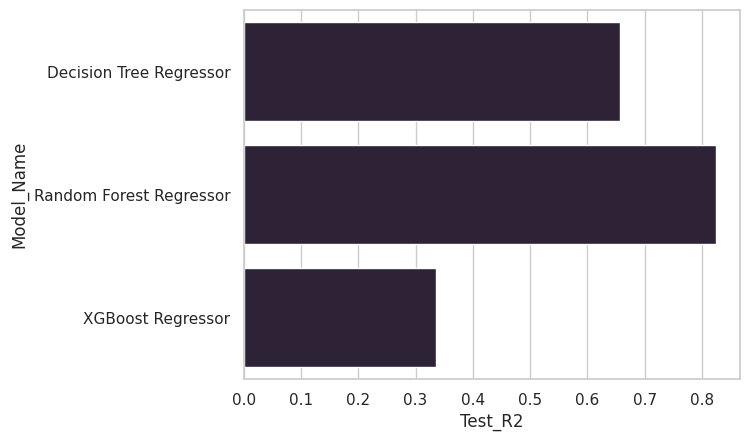

In [120]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_R2'])

In [122]:
#test values
baseline_r2 = 0.656444
random_r2 = 0.824541
r_tuned_r2 = 0.819486
XGBoost_r2 = 0.334879

In [123]:
#improvement %
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 25.607 % was seen in Random Forest against Decision Tree.


In [124]:
#improvement % of tuned vs baseline

improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

Model Performance
Improvement of 24.837 % was seen in Random Forest Tuned against Decision Tree.


In [125]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of -0.613 % was seen in Random Forest Tuned against Simple Random Forest.


In [126]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - XGBoost_r2)/XGBoost_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against XGBoost Regressor.')

Model Performance
Improvement of 144.711 % was seen in Random Forest Tuned against XGBoost Regressor.


# **Store wise Sales Predictions**

In [127]:
#predictions
y_pred_test = random_t.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [128]:
#head
six_weeks_sales_df.head()

Sales  Pred_Sales
Date       Store                      
2015-06-15 1     -0.328664   -0.314849
           2      0.574378    0.272835
           3      1.252047    1.161472
           4      1.572145    1.735075
           5      0.486429    0.502253

In [129]:
#inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])

In [130]:
#sales vs predictions
six_weeks_sales_df.head()

Sales  Pred_Sales
Date       Store                      
2015-06-15 1      8.615771    8.621654
           2      9.000360    8.871938
           3      9.288967    9.250392
           4      9.425290    9.494680
           5      8.962904    8.969643

In [131]:
#locating
six_weeks_sales_df.loc[('2015-06-15',5)]

Sales         8.962904
Pred_Sales    8.969643
Name: (2015-06-15 00:00:00, 5), dtype: float64

In [133]:
#locating
six_weeks_sales_df.loc[('2015-07-28',56)]

Sales         9.035987
Pred_Sales    8.813977
Name: (2015-07-28 00:00:00, 56), dtype: float64

In [132]:
#locating
six_weeks_sales_df.loc[('2015-07-21',10)]

Sales         8.776321
Pred_Sales    8.623794
Name: (2015-07-21 00:00:00, 10), dtype: float64

# **Conclusion**

There's a positive correlation between customers and sales which is explanatory.

Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

The positive effect of promotion on Customers and Sales is observable.

It is clear that most of the stores remain closed during State and School Holidays.

Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

# **Recommendations**

More stores should be encouraged for promotion.
Store type B should be increased in number.
There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***